In [82]:
def give_output (DataPath,trueval,usl,lsl,subgroup_size,A2,D3,D4):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import statistics as statistics
    import tensorflow as tf
    xbar = []
    range = []


    df  = pd.read_csv(DataPath)




    data = df.transpose().to_numpy()
    for group in data:
        xbar.append(statistics.mean(group))
        range.append(group.max() - group.min())

    xbarbar = statistics.mean(xbar)
    rbar = statistics.mean(range)
    uclx = xbarbar + A2*rbar
    lclx = xbarbar - A2*rbar

    uclr = D4*rbar
    lclr = D3*rbar





    fig, axs = plt.subplots(2, figsize=(15,15))


    # x chart
    axs[0].plot(xbar, linestyle='-', marker='o', color='black')
    axs[0].axhline(uclx, color='red', linestyle='dashed')
    axs[0].axhline(lclx, color='red', linestyle='dashed')
    axs[0].axhline(xbarbar, color='blue')
    axs[0].set_title('x-bar Chart')
    axs[0].set(xlabel='Group', ylabel='Mean')
    axs[0].axhline(usl,color = 'blue',linestyle = 'dashed')
    axs[0].axhline(lsl,color = 'blue',linestyle = 'dashed')




    # r chart
    axs[1].plot(range, linestyle='-', marker='o', color='black')
    axs[1].axhline(uclr, color='red', linestyle='dashed')
    axs[1].axhline(lclr, color='red', linestyle='dashed')
    axs[1].axhline(rbar, color='blue')
    axs[1].set_title('r_bar chart')
    axs[1].set(xlabel='Group', ylabel='Range')




    control = True
    for val in (0,(len(xbar)-1)):
        if xbar[val]>=uclx or xbar[val]<=lclx:
            print(str(xbar[val])+" XBar value number "+str(val)+" is out of control ")
            control = False


    for val in (0,len(range)-1):
        if range[val]>=uclr or range[val]<=lclr:
            print(str(range[val])+" Range value number "+str(val)+" is out of control ")
            control = False





    xbar_belowxbarbar = []
    xbar_abovexbarbar = []

    range_belowrbar = []
    range_aboverbar = []
    for val in (0,len(xbar)-1):
        if xbar[val]<xbarbar:
            xbar_belowxbarbar.append(xbar[val])
        else:
            xbar_abovexbarbar.append(xbar[val])

    for val in (0,len(range)-1):
        if range[val]<rbar:
            range_belowrbar.append(range[val])
        else:
            range_aboverbar.append(range[val])





    if len(xbar_belowxbarbar) >= 0.7*len(xbar):
        control = False
        print ("Xbar chart: weighted below mean")
    elif len(xbar_abovexbarbar) >= 0.7*len(xbar):
        control = False
        print ("Xbar chart: weighted above mean")
    elif len(range_belowrbar) >= 0.7*len(range):
        control = False
        print ("Range chart: weighted below mean")
    elif len(range_aboverbar) >= 0.7*len(range):
        control = False
        print ("Range chart: weighted above mean")





    sixsigma = uclx-lclx
    Cp = (usl-lsl)/sixsigma
    Cpk = min([(usl - xbarbar),(xbarbar - lsl)])


    if Cp<1:
        print('Process not capable, Cp<1')

    if Cpk<0:
        print("Not capable, mean out of specification")
        control = False
    if Cpk == 0:
        print("not capable, mean at LSL or USL")
    if usl < uclx or lsl>lclx:
        print("not capable: control limits beyond specification limit")





    model = tf.keras.models.load_model('control_charts.h5')
    #'control_charts.h5' is the imported model .h5 file format uploaded in the colab subfiles
    xbara = np.array(xbar)
    rangea = np.array(range)


    xbarn = xbara/xbara.max()
    rangen = rangea/rangea.max()

    xbarn = xbarn.reshape((1,60))
    rangen = rangen.reshape((1,60))



    xbarprediction = model.predict(xbarn)
    rangeprediction = model.predict(rangen)
    print(xbarprediction)
    print(rangeprediction)
    print(str(xbarbar)+" is the mean of xbar chart")
    print(str(rbar)+" is the mean of the range chart")


    indicesxbar = np.where(xbarprediction == xbarprediction.max())
    indx = indicesxbar[1]

    if indx == 0:
      patternx = "Cyclical"
    elif indx == 1:
      patternx = "Decreasing Trend"
    elif indx == 2:
      patternx = "Downward Shift"
    elif indx == 3:
      patternx = "Increasing Trend"
    elif indx == 4:
      patternx = "Normal-Random Pattern"
    elif indx == 5:
      patternx = "Upward Shift"



    indicesrange = np.where(rangeprediction == rangeprediction.max())
    indr = indicesrange[1]
    if indr == 0:
      patternr = "Cyclical"
    elif indr == 1:
      patternr = "Decreasing Trend"
    elif indr == 2:
      patternr = "Downward Shift"
    elif indr == 3:
      patternr = "Increasing Trend"
    elif indr == 4:
      patternr = "Normal-Random Pattern"
    elif indr == 5:
      patternr = "Upward Shift"


    print(patternx)
    print(patternr)



















40.0275 XBar value number 0 is out of control 
0.0799999999999983 Range value number 0 is out of control 
1/1 [==============================] - 0s 34ms/step
[[1.5190310e-03 2.4794851e-04 2.5667616e-03 4.7423178e-03 9.9063092e-01
  2.9299656e-04]]
[[0.71413356 0.14317359 0.05085535 0.0139734  0.03636625 0.04149788]]
39.97266666666667 is the mean of xbar chart
0.02633333333333212 is the mean of the range chart
Normal-Random Pattern
Cyclical


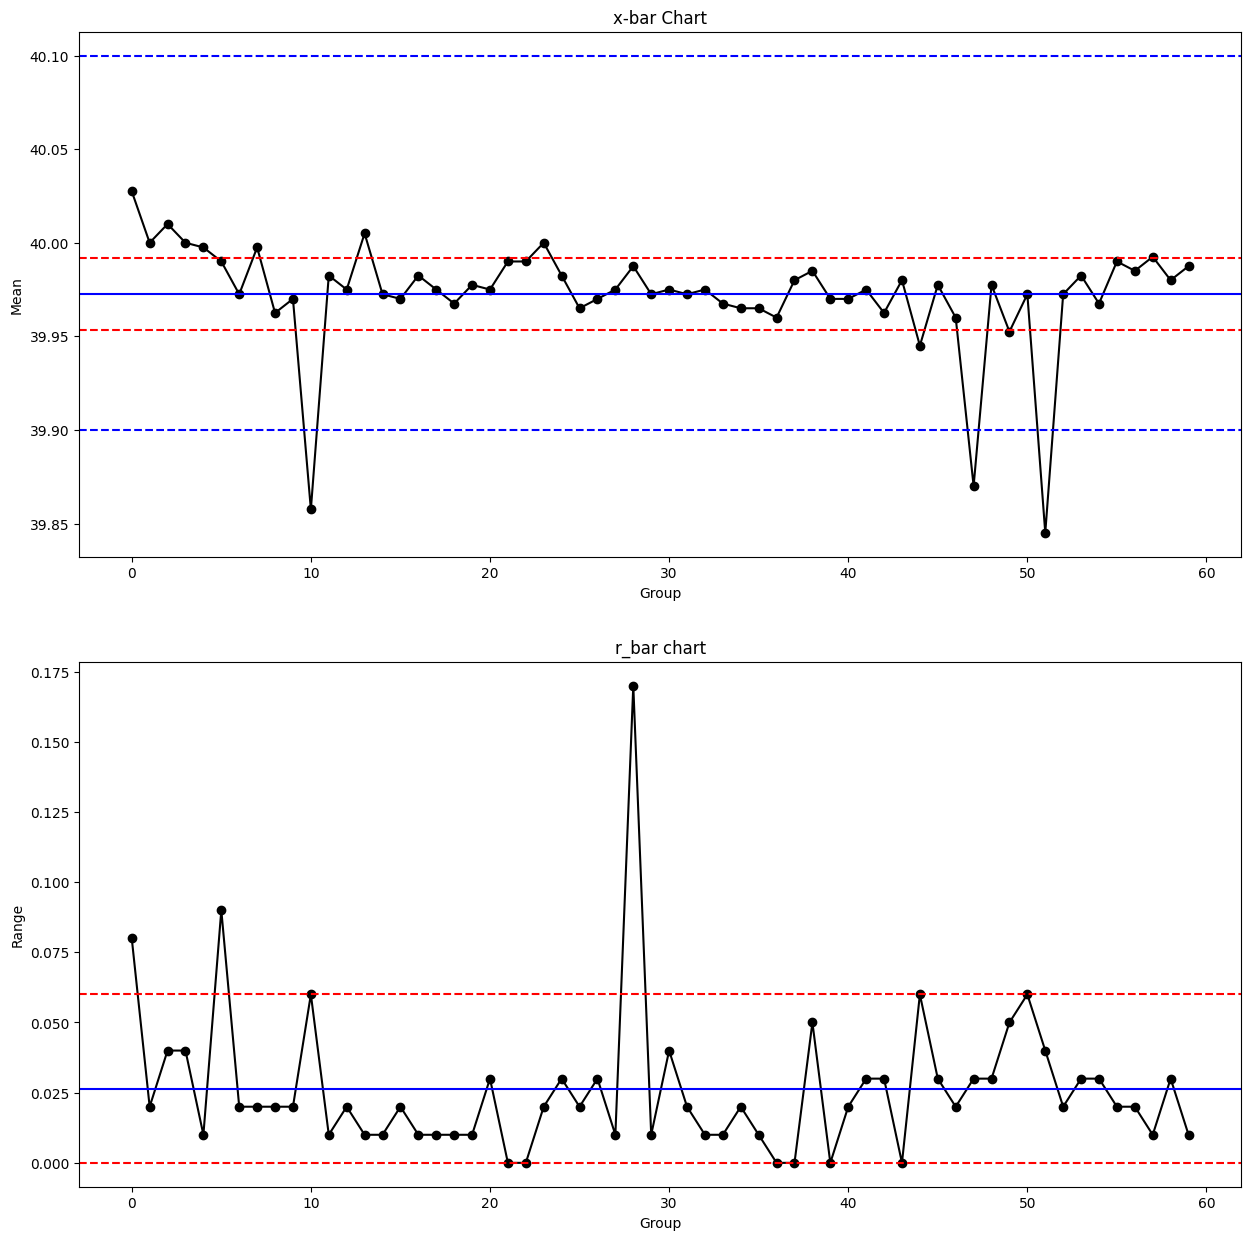

In [83]:
give_output("diameter.csv",40,40.1,39.9,4,0.729,0,2.282)


1/1 [==============================] - 0s 23ms/step
[[1.4955119e-03 2.4500675e-04 2.5121470e-03 4.8943139e-03 9.9054682e-01
  3.0619098e-04]]
[[0.82940483 0.0921374  0.03735366 0.00137784 0.03488755 0.00483873]]
21.99725 is the mean of xbar chart
0.05300000000000029 is the mean of the range chart
Normal-Random Pattern
Cyclical


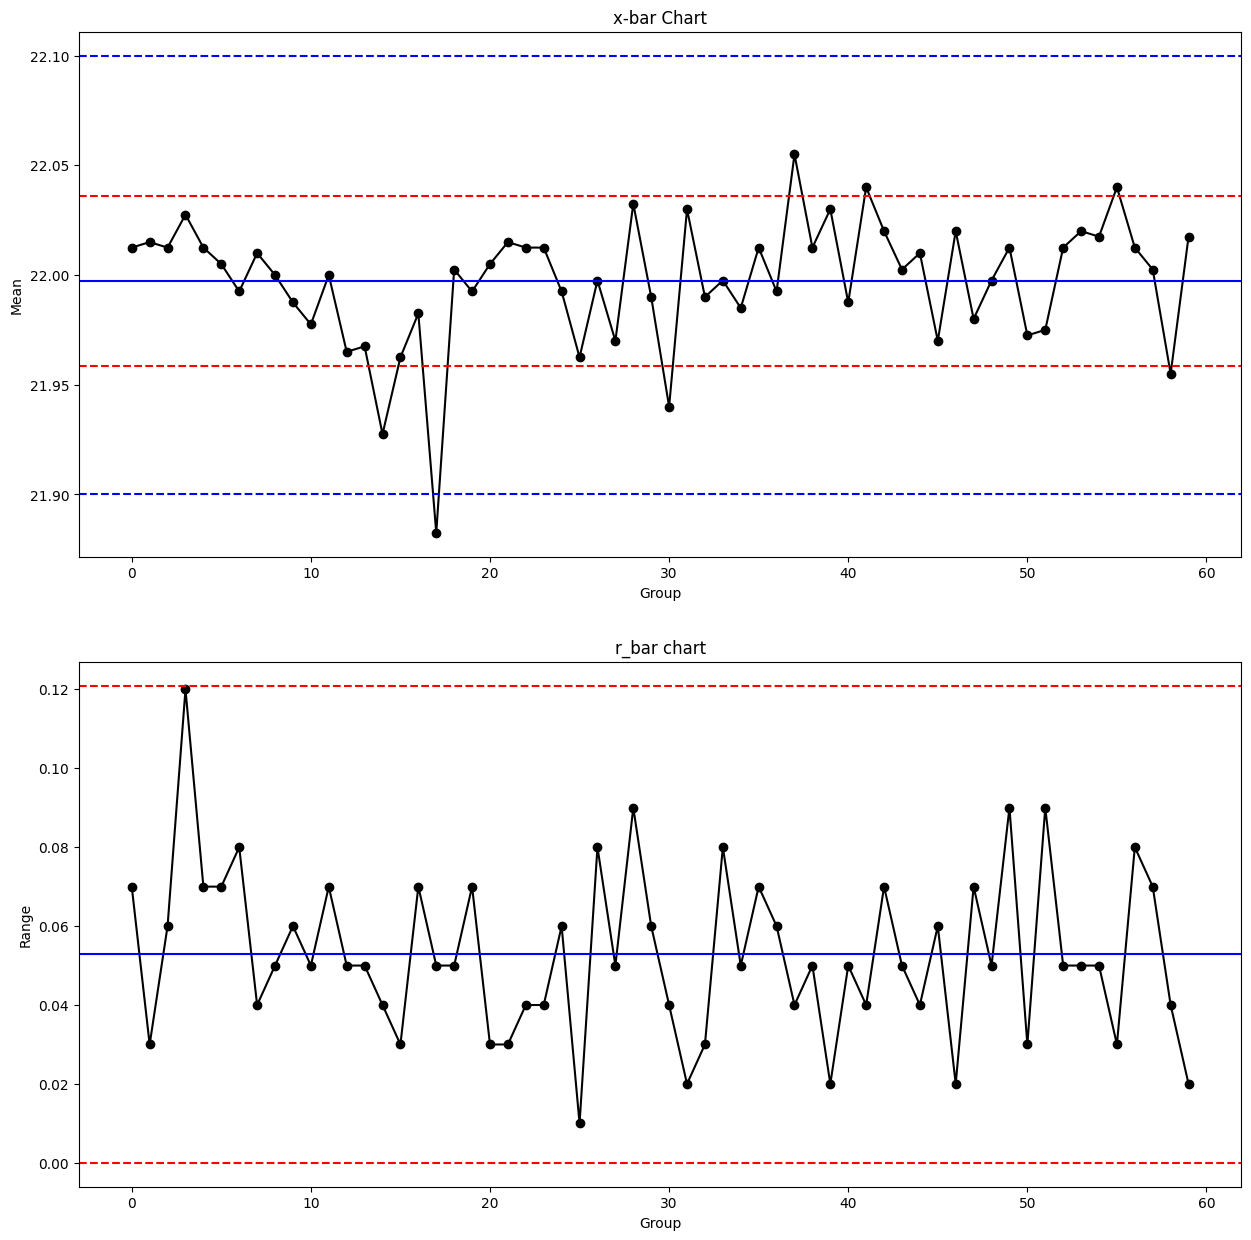

In [84]:
give_output("width.csv",22,22.1,21.9,4,0.729,0,2.282)